# Introduction

This notebook shows how to acquire data from OPC DA Server using Python. It also exhibits how we can perform real-time plotting with Python language.

In this test environment, we have installed Python 3.9 as our main programming language and Matrikon OPC Server for Simulation as the OPC DA Server. In order for the code to work properly, <font color='red'><b>you have to install Python 32 bit version.</b></font> Also, there are several packages you need to install prior to usage of this notebook. 

This includes:
OpenOPC_Python3X
pywin32

# Sample Code

## Making Connections
Below are some sample codes you may reference when using OpenOPC package.

In [1]:
#This cell imports necessary packages
import OpenOPC
import pywintypes
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

The first step is to create opc client object by using OpenOPC.client

In [2]:
pywintypes.datetime = pywintypes.TimeType
opc = OpenOPC.client()

By running servers() method, the program searches for available OPCDA servers for you

In [3]:
# Search available servers using server() method
servers = opc.servers()
servers

['Matrikon.OPC.Simulation.1']

By using connect() method and passing on server string, you can make connection with desired OPC DA Server

In [4]:
# Make connection using connect() method
opc.connect('Matrikon.OPC.Simulation.1')
aliases = opc.list()
print(aliases)

['Simulation Items', 'Configured Aliases']


You can use list() method to explore available items within group

In [5]:
# Use list() to explore available items
groups = opc.list('Simulation Items.Random')
print(groups)

['Random.ArrayOfReal8', 'Random.ArrayOfString', 'Random.Boolean', 'Random.Int1', 'Random.Int2', 'Random.Int32', 'Random.Int4', 'Random.Money', 'Random.Qualities', 'Random.Real4', 'Random.Real8', 'Random.String', 'Random.Time', 'Random.UInt1', 'Random.UInt2', 'Random.UInt4']


## Reading and Writing Values

Once you are able to locate the tag(or variable), apply read() method to read value from tag

In [6]:
# Read() method return a tuple with value, quality and timestamp of that tag
opc.read('Random.Int32')

(26500.0, 'Good', '2022-11-22 13:58:58+00:00')

You can also write the value of specific OPC DA tag passing (tag string, value) tuple to write() method

In [7]:
# Index desired variable and apply write method to write value
print("The original value of {} is {}".format('Bucket Brigade.Int4', opc.read('Bucket Brigade.Int4')[0]))
opc.write(('Bucket Brigade.Int4',5))
print("The modified value of {} becomes {}".format('Bucket Brigade.Int4', opc.read('Bucket Brigade.Int4')[0]))

The original value of Bucket Brigade.Int4 is 10
The modified value of Bucket Brigade.Int4 becomes 5


You can also work on multiple tags at one time by passing list of tag string

In [8]:
# Define tag group list and pass on to read and write method
tag_group = ['Bucket Brigade.Int4','Bucket Brigade.Int2']
print("The original value of {} is {}".format(tag_group, [x[1] for x in opc.read(tag_group)]))

tag_group_write = [('Bucket Brigade.Int4',10),('Bucket Brigade.Int2',8)]
opc.write(tag_group_write)
print("The modified value of {} becomes {}".format(tag_group, [x[1] for x in opc.read(tag_group)]))

The original value of ['Bucket Brigade.Int4', 'Bucket Brigade.Int2'] is [5, 8]
The modified value of ['Bucket Brigade.Int4', 'Bucket Brigade.Int2'] becomes [10, 8]


## Real-Time Data Acquisition with Python OpenOPC

In this section, we gather real-time data from our OPC DA simulation server and perform real-time plotting to visualize collected data. 

<IPython.core.display.Javascript object>


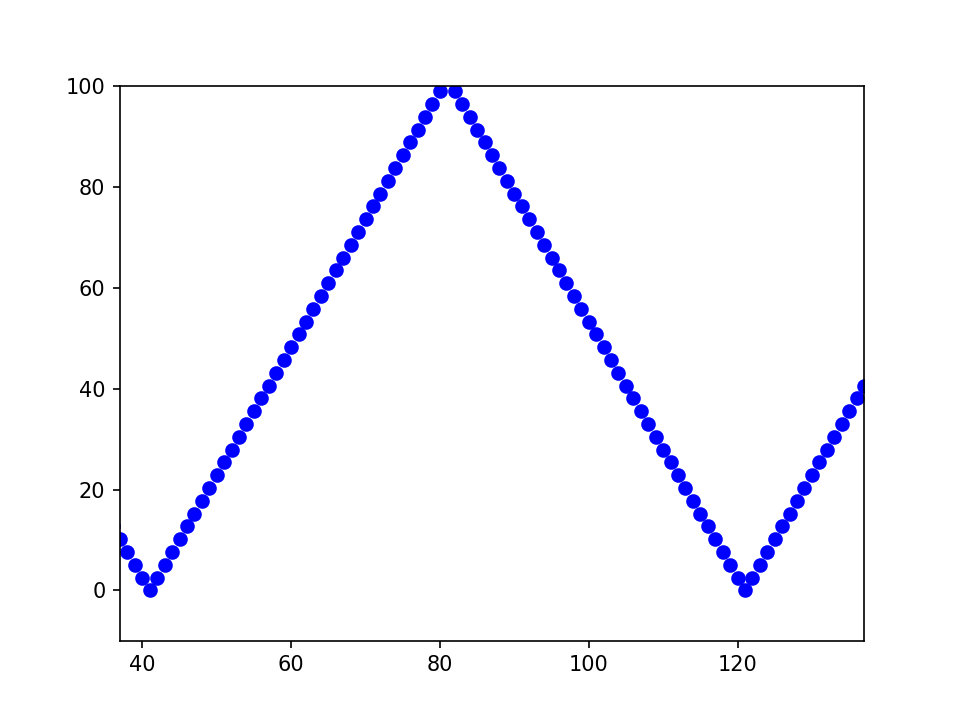

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Activate interactive plotting in Jupyter Notebook
%matplotlib notebook 

#Initiate figure and ax objects
fig, ax = plt.subplots()
x, y = [], []
line, = ax.plot([], [], 'bo')

def init():
    """
    This init function defines the initial plot parameter
    """
    # Set initial parameter for the plot
    ax.set_xlim(0, 100)
    ax.set_ylim(-10, 100)
    return line,

def animate(frame):
    """
    This function will be called periodically by FuncAnimation. Frame parameter will be passed on each call as a counter. 
    """
    # Append data to x and y data list
    x.append(frame)
    y.append(opc.read('Triangle Waves.Real4')[0])
    
    # Adjust limit when step count exceeds certain number (100 in this case)
    limit =  max(100, max(x))
    ax.set_xlim(limit-100, limit)
    
    # Set data for line plot
    line.set_data(x, y)
    return line,

# Create FuncAnimation object and plt.show() to show the updated animation
ani = FuncAnimation(fig, animate, frames = np.linspace(1,1000,1000), interval=1000, init_func=init, blit=True)
plt.show()

Finally, close the connection once you are done with OPC DA server

In [10]:
# Close connection with close() method
opc.close()

# Conclusion

We are now able to connect to OPC DA server and read/write values from and to the server. With the real-time plotting example, we can now ensure the functionality of connection to OPC DA server.